<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2019/sem_6/student_teacher_dist.png" height="300" width="700"> 
</center>

# <center> R для тервера и матстата. <br>  <br>  8.1 Критерии согласия. </center>



Данный ноутбук является конспектом по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2019). Автор ноутбука [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/r_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

---------

Пришло время обсудить критерии согласия.  __Критерий согласия -__ критерий о виде неизвестного закона распределения. Критерии согласия бывают разными. Все они строятся ровно на той же мысли, что и параметрические критерии. Нужно считать расстояния. И в данной ситуации это расстояния между распределениями. 

In [2]:
library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов
library("dplyr")    # Куда же без пакета под таблички :) 

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

Для начала построим красивую картинку и попытаемся понять как можно измерить расстояние между двумя разными распределениями. 

In [3]:
n_obs = 100
sample1 <- rnorm(n_obs, mean=10, sd=5)
sample2 <- rnorm(n_obs, mean=1, sd=5)

# создали эмпирические функции распределения на основе данных
cdf1 <- ecdf(sample1) 
cdf2 <- ecdf(sample2) 

df <- data.frame(sample1 = sample1, sample2 = sample2)

# находим супремум (ниже поймём зачем)
minMax <- seq(min(sample1, sample2), max(sample1, sample2), length.out=length(sample1)) 
x0 <- minMax[which(abs(cdf1(minMax) - cdf2(minMax)) == max(abs(cdf1(minMax) - cdf2(minMax))))] 
y0 <- cdf1(x0) 
y1 <- cdf2(x0) 

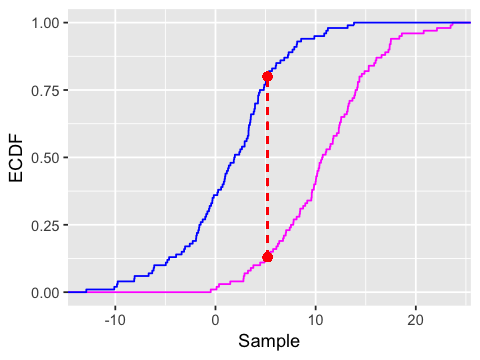

In [4]:
ggplot(df)+
    stat_ecdf(aes(x=sample1), col='magenta') + 
    stat_ecdf(aes(x=sample2), col='blue') +
    geom_segment(aes(x = x0[1], y = y0[1], xend = x0[1], yend = y1[1]),
        linetype = "dashed", color = "red") + 

    geom_point(aes(x = x0[1] , y= y0[1]), color="red", size=2) +
    geom_point(aes(x = x0[1] , y= y1[1]), color="red", size=2) +
    xlab("Sample") +
    ylab("ECDF")

# 1. Теорема Гливенко-Кантелли

Пусть $X_1, \ldots, X_n \sim iid F$, где $F$ - какой-то закон распределения. Тогда для эмпирической функции распределения $\hat F_n$, построенной на основе этой выборки справедливо, что 

$$
\sup_{x \in \mathbb{R}} \mid \hat F_n(x) - F(x) \mid \overset{\text{п.н.}}{\to} 0
$$

В каком-то смысле эта теорема воспроизводит усиленный ЗБЧ для функций распределения. В случае случайных величин мы говорили, что если $X_1, \ldots, X_n \sim iid F$, тогда $$\bar x - E(X) \overset{\text{п.н.}}{\to} 0.$$

# 2. Теорема Колмогорова 

Пусть $X_1, \ldots, X_n \sim iid F$, где $F$ - какой-то __непрерывный__ закон распределения. Тогда для эмпирической функции распределения $\hat F_n$, построенной на основе этой выборки справедливо, что 

$$
\sqrt{n} \cdot \sup_{x \in \mathbb{R}} \mid \hat F_n(x) - F(x) \mid \overset{d}{\to} D,
$$

где функция распределения случайной величины $D$ выглядит как

$$
F_D(x) = 1 + 2 \cdot \sum_{i=1}^{+\infty} (-1)^k \cdot e^{-2k^2 x^2}.
$$

В каком-то смысле эта теорема воспроизводит ЦПТ для функций распределения. В случае случайных величин мы говорили, что если $X_1, \ldots, X_n \sim iid F$, тогда $$\sqrt{n} \cdot(\bar x - E(X)) \overset{d}{\to} N(\mu, \sigma^2).$$

# 3. Критерий Колмогорова

Теорема Колмогорова - наш новый союзник! Она подсказывает нам как именно будет распределён супремум между эмпирической функцией распределения и теоретической функцией распределения. Нам остаётся только найти по выборке оценку для этого супремума и посмотреть попал ли он в критическую область. 

__Гипотеза:__ 

$$
\begin{aligned}
H_0 : X \sim F_0 \\
H_1 : X \nsim F_0
\end{aligned}
$$

__Статистика:__ 

$$
D_n (x_1, \ldots x_n) = \max_{1 \le i \le n} \left(\frac{i}{n} - F(x_{(i)});  F(x_{(i)}) - \frac{i - 1}{n} \right)  
$$

Это оценка супремума по выборке, просто страшно выписывается, спокуха!

In [5]:
x <- rnorm(10) # выборка 
x <- sort(x)   # отсортируем её 
x

[1] -1.6666652 -1.3640702 -0.9225978 -0.8885293 -0.7442328 -0.3387812
 [7] -0.2832396  0.5990486  0.7224623  1.4524369

In [6]:
# значения настоящей функции распределения в соотвествующих точках
pnorm(sort(x))

[1] 0.04779049 0.08627273 0.17810841 0.18712804 0.22836781 0.36738728
 [7] 0.38849659 0.72542975 0.76499485 0.92680992

In [7]:
D = 0 # для наблюдаемого значения статистики

# идём по всем наблюдениям по очереди
for(i in 1:10){
    # оценили эмпирическую функцию в текущей точке и вычли теоретическую 
    d1 = i/10 - pnorm(x[i])
    
    # наоборот, если знак отрицательный, -1, чтобы учесть что P(X <= x)
    d2 = pnorm(x[i]) - (i - 1)/10
    
    # выбрали максимум
    if(max(d1, d2) > D){
        D = max(d1, d2)
    }
}

D

[1] 0.3115034

Сверимся с пакетом из R! 

In [8]:
ks.test(x, "pnorm", mean = 0, sd = 1)


	One-sample Kolmogorov-Smirnov test

data:  x
D = 0.3115, p-value = 0.2327
alternative hypothesis: two-sided


Важный нюанс. Если значения параметров незвестны, критерий перестаёт работать.

In [9]:
ks.test(x, "pnorm", mean = mean(x), sd = sd(x))


	One-sample Kolmogorov-Smirnov test

data:  x
D = 0.17579, p-value = 0.866
alternative hypothesis: two-sided


Однако для ситуаций, когда мы хотим сначала оценить параметры, а потом применить критерий Колмогорова-Смирнова, есть его модернизации. Но мы не будем об этом говорить. Попробуем попроверять гипотезы встроенной в R функцией. Сгенерируем выборку из равномерного распределения, а после протестируем гипотезу о нормальности. 

In [10]:
x <- runif(1000)
ks.test(x, "pnorm", mean = mean(x), sd = sd(x))


	One-sample Kolmogorov-Smirnov test

data:  x
D = 0.075062, p-value = 2.553e-05
alternative hypothesis: two-sided


$p$-value очень низкое. Гипотеза о нормальности отвергается. По аналогии можно протестировать гипотезу для любого распределения. Вот пример с экспоненциальным распределением: 

In [11]:
x <- rexp(1000, rate = 2)
ks.test(x, "pexp", rate = 2)


	One-sample Kolmogorov-Smirnov test

data:  x
D = 0.026691, p-value = 0.4744
alternative hypothesis: two-sided


Ещё одно полезное свойство критерия: можно проверять гипотезу об однородности выборок, то есть пытаться понять из одного ли распределения они к нам пришли. В R это реализуется следующим образом: 

In [12]:
x <- rexp(100, rate = 2)
y <- rexp(100, rate = 2)
ks.test(x, y)


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.13, p-value = 0.3667
alternative hypothesis: two-sided


In [13]:
x <- rexp(100, rate = 2)
y <- rnorm(100)
ks.test(x, y)


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.55, p-value = 1.458e-13
alternative hypothesis: two-sided


# 4. Критерий Пирсона 

Расстояния между распределениями можно считать очень по-разному. Выше мы делали это через супремум. Критерий Пирсона предлагает делать это с помощью сверки эмпирических частот и теоретических. 

* Разобьём все значения, которые может принимать случайная величина на $k$ отрезков. 
* Посчитаем с какой частотой случайная величина попадает на какой отрезок. Это оценка вероятности $P(a \le X \le b)$. Обозначим за $v_j$ - количество элементов, попавших в отрезок $j$. 
* Найдём теоретические значения вероятностей попасть в соответствующие отрезки, $p_j$. 
* Если разницы $p_j - \frac{v_j}{n}$ окажутся не очень большими, мы на коне. Гипотезу отвергать нельзя. 

Давайте будем штрафовать за большие разности сильнее, чем за маленькие, то есть будем искать $ \left(p_j - \frac{v_j}{n} \right)^2.$ Чтобы получить статистику с распределением $\chi^2_{k-1}$, нужно поделить эту разность на $p_j$. В итоге получаем следующую процедуру:  

__Гипотеза:__ 

$$
\begin{aligned}
H_0 : X \sim F_0 \\
H_1 : X \nsim F_0
\end{aligned}
$$

__Статистика:__ 

$$
\sum_{j=1}^k \frac{(v_j - np_j),2}{np_j} \sim \chi^2_{k-1}
$$

Давайте докажем, что статистика будет действительно так распределена. Этот факт называется __Теоремой Пирсона.__ 

Будем доказывать для случая, когда $k=2$. В этом случае мы делаем разбиение на два отезочка. И у нас выполняется $v_2 = n - v_1$ и $p_2 = 1 - p_1$. Выписываем статистику Пирсона, и заодно вспоминаем ЦПТ: 


\begin{multline*}
\frac{(v_1 - n p_1)^2}{n p_1} + \frac{(v_2 - n p_2)^2}{n p_2} = \frac{(v_1 - n p_1)^2}{n p_1} + \frac{(n - v_1 - n(1 - p_1))^2}{n (1 - p_1)} = \\ = \frac{(v_1 - n p_1)^2}{n p_1} + \frac{- v_1 + n p_1)^2}{n (1 - p_1)} = \frac{(v_1 - n p_1)^2}{n p_1 (1 - p_1)} = \left(\frac{v_1 - n p_1}{\sqrt{n p_1 (1 - p_1)}} \right)^2 
\end{multline*}


Выражение, которое находится под квадратом в последней скобке, по ЦПТ имеет $N(0,1)$. Значит случайная величина будет иметь распределение $\chi^2_{k-1}$. 


Доказательство для любого $k$ есть в [Черновой на странице 125.](https://github.com/FUlyankin/r_probability/raw/master/books/Хороший%20учебник%20по%20матстату.pdf) Там вылезает многомерное нормальное распределение и матрицы. Можно доказать чуть проще, если знать один очень крутой факт: 

Если $\varepsilon$ - вектор из независимых нормально распределенных случайных величин, $N(0, 1)$, а $A$ - симметричная матрица с собственными значениями $0$ и $1$, тогда случайная величина $\varepsilon^T A \varepsilon \sim \chi^2_{rank(A)}.$

__Важно понимать,__ что если у альтернативной гипотезы вероятности попадания в интервалы точно такие же, как и у нелевой гипотезы, критерий не сможет различить гипотезы между собой. Из-за этого стараются брать как можно больше интервалов для разбиения, чтобы различить между собой гипотезы было проще.

Как-то раз я говорил, что многие вещи в R реализованы очень криво либо не реализованы вообще. Тест Пирсона - это именно такой случай. В R тест хочет получить на вход уже готовую таблицу сопряжённости. 

In [14]:
mytable <- cbind(c(50, 50), c(60, 40))
mytable

50,60
50,40


In [15]:
chisq.test(mytable)


	Pearson's Chi-squared test with Yates' continuity correction

data:  mytable
X-squared = 1.6364, df = 1, p-value = 0.2008


Для дискретных распределений сварить такую табличку просто. Для непрерывных возникают проблемы. К счастью, есть супер-функция `hist`, которая строит гистограмму и заодно оценивает все эмпирические вероятности для разных отезков.

Warning message in hist.default(x, breaks = 50, include.lowest = FALSE, right = FALSE):
“'include.lowest' ignored as 'breaks' is not a vector”

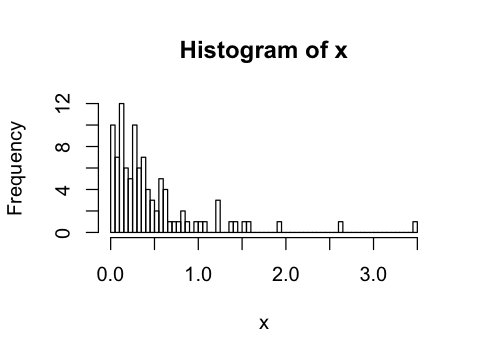

In [16]:
x <- rexp(100, rate = 2)
p1 <- hist(x,breaks=50, include.lowest=FALSE, right=FALSE)

In [17]:
p1

$breaks
 [1] 0.00 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70
[16] 0.75 0.80 0.85 0.90 0.95 1.00 1.05 1.10 1.15 1.20 1.25 1.30 1.35 1.40 1.45
[31] 1.50 1.55 1.60 1.65 1.70 1.75 1.80 1.85 1.90 1.95 2.00 2.05 2.10 2.15 2.20
[46] 2.25 2.30 2.35 2.40 2.45 2.50 2.55 2.60 2.65 2.70 2.75 2.80 2.85 2.90 2.95
[61] 3.00 3.05 3.10 3.15 3.20 3.25 3.30 3.35 3.40 3.45 3.50

$counts
 [1] 10  7 12  6  5 10  6  7  4  3  2  5  4  1  1  1  2  1  0  1  1  1  0  0  3
[26]  0  0  1  1  0  1  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
[51]  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1

$density
 [1] 2.0 1.4 2.4 1.2 1.0 2.0 1.2 1.4 0.8 0.6 0.4 1.0 0.8 0.2 0.2 0.2 0.4 0.2 0.0
[20] 0.2 0.2 0.2 0.0 0.0 0.6 0.0 0.0 0.2 0.2 0.0 0.2 0.2 0.0 0.0 0.0 0.0 0.0 0.0
[39] 0.2 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.2 0.0 0.0 0.0 0.0
[58] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.2

$mids
 [1] 0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.

Теперь нам нужно посчитать для каждго из отрезков теоретические вероятности. Для этого нужен костыль. Его можно соорудить, например, так: 

In [18]:
library('zoo')
breaks_cdf <- pexp(p1$breaks, rate = 2)    #посчитали в каждой точке 
null_probs <- diff(breaks_cdf)             #посчитали разности


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [19]:
length(p1$counts)
length(null_probs)

[1] 70

[1] 70

In [20]:
# две опции справа, что привести посчитанные вероятности в сумму к 1 
# и сделать примерную генерацию pvalue

chisq.test(p1$counts, p=null_probs, rescale.p=TRUE, simulate.p.value=TRUE)


	Chi-squared test for given probabilities with simulated p-value (based
	on 2000 replicates)

data:  p1$counts
X-squared = 151.2, df = NA, p-value = 0.03448


По аналогии с Колмогоровым, можно тестировать выборки на однородность. 

# 5. Вместо итога. 

Измерять расстояния между распределениями можно очень по-разному. В течение своей жизни вы будете сталкиваться с самыми разными критериями. Здесь я приведу две модернизации критерия Колмогорова и успокоюсь.

В критерии Колмогорова мы искали 

$$
\sup_{x \in \mathbb{R}} \mid \hat F_n(x) - F(x) \mid,
$$ 

то есть мерили расстояние с помощью супремума. Можно заменить супремум на какую-нибудь другую метрику, например на вот такую: 

$$
\int_{-\infty}^{+\infty} (\hat F_n(x) - F(x))^2 \cdot \psi(F(x)) f(x) dx 
$$

В этом случае мы будем смотреть на всю площадь между кривыми и, по аналогии с критерием Пирсона, более сильно штрафовать более большие расстояния между функциями. Если взять $\psi(F(x)) = 1$, мы получим критерий Крамера-Мизеса. Из-за квадрата он более чувствителен к отклонениям в среднестане, чем критерий Колмогорова. Если взять $\psi(F(x)) = \frac{1}{F(x) (1 - F(x))}$, мы получим критерий Андерсона-Дарлинга.  Он придаёт дополнительный, более большой вес, хвостам распределения и чётче улавливает разницу в них. На эти два критерия более пристально мы посмотрим, когда будем говорить о финансах и доходностях. 
